In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/gym_churn_us.csv")

# 데이터 개요 파악
print("Data Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-n

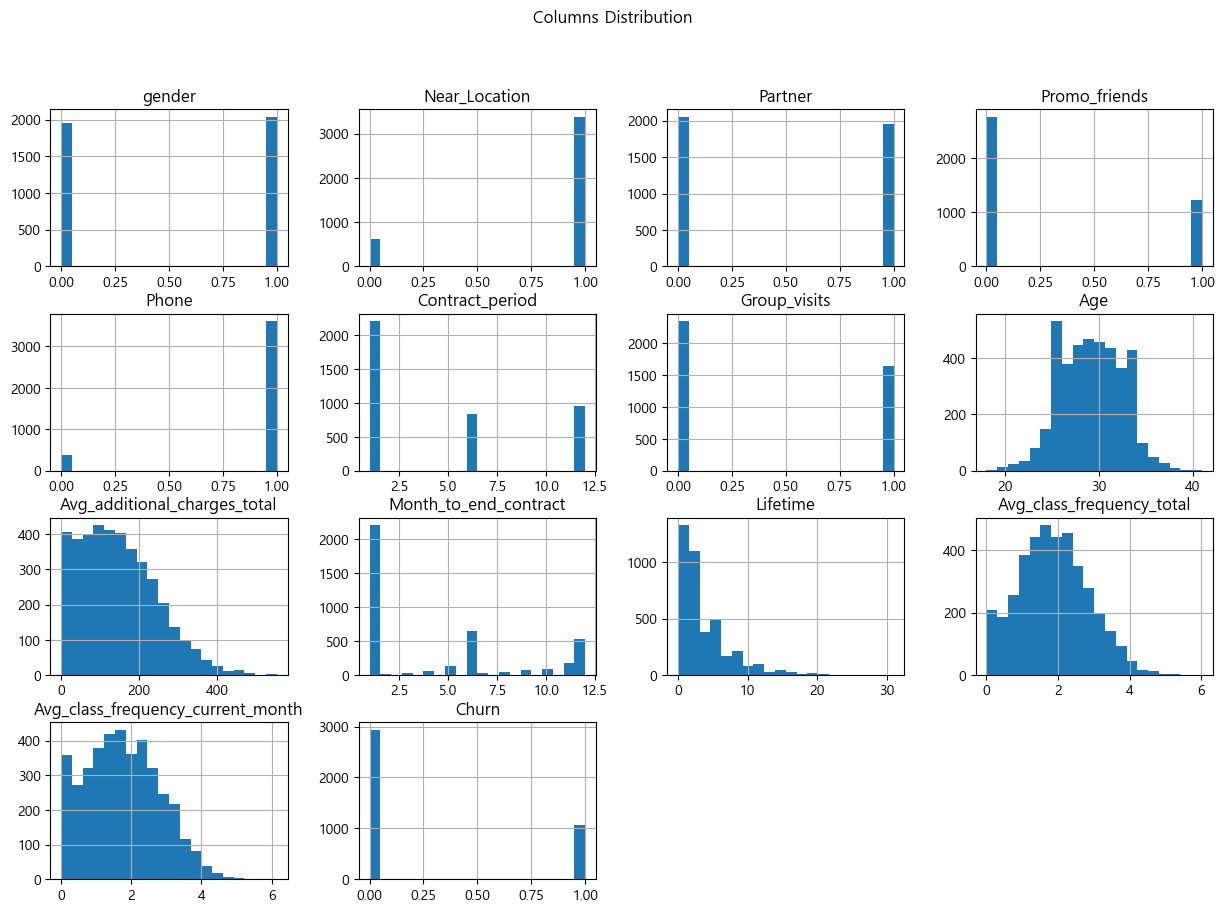

In [7]:
# 수치형 변수 분포 시각화
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Columns Distribution")
plt.show()

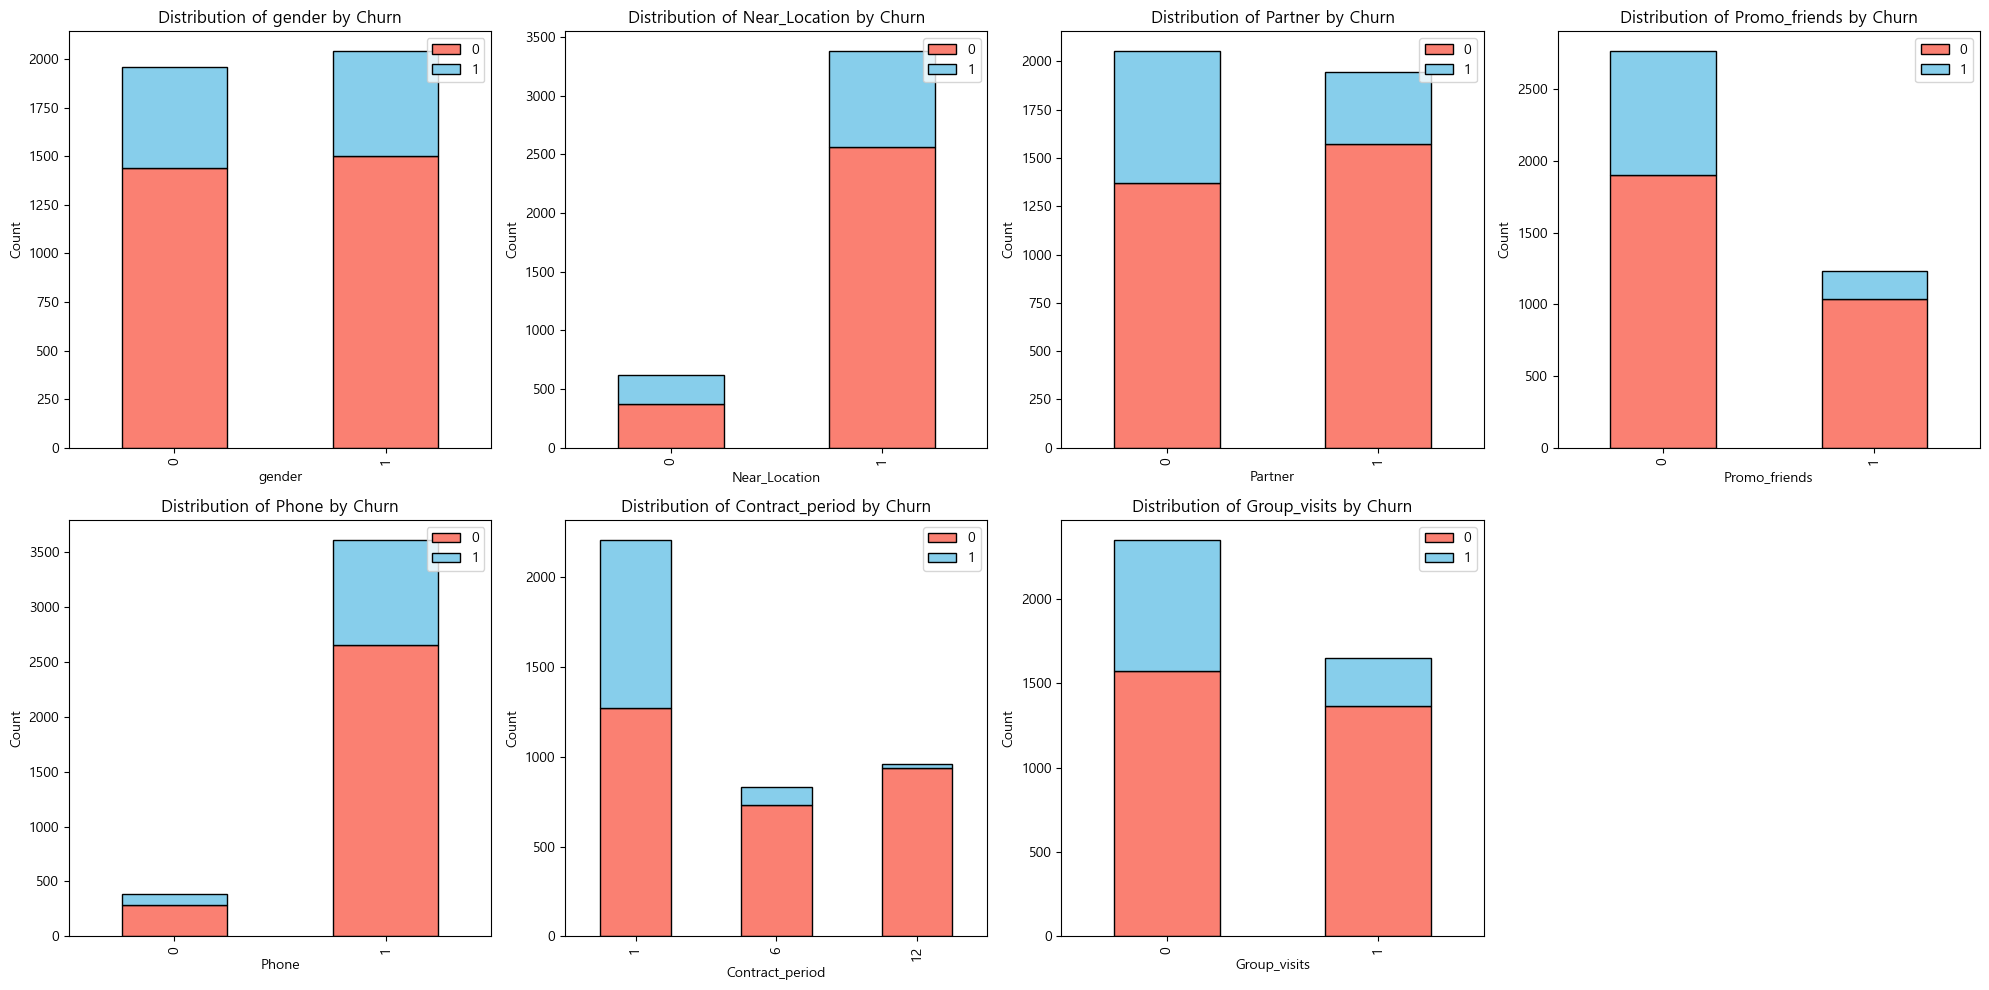

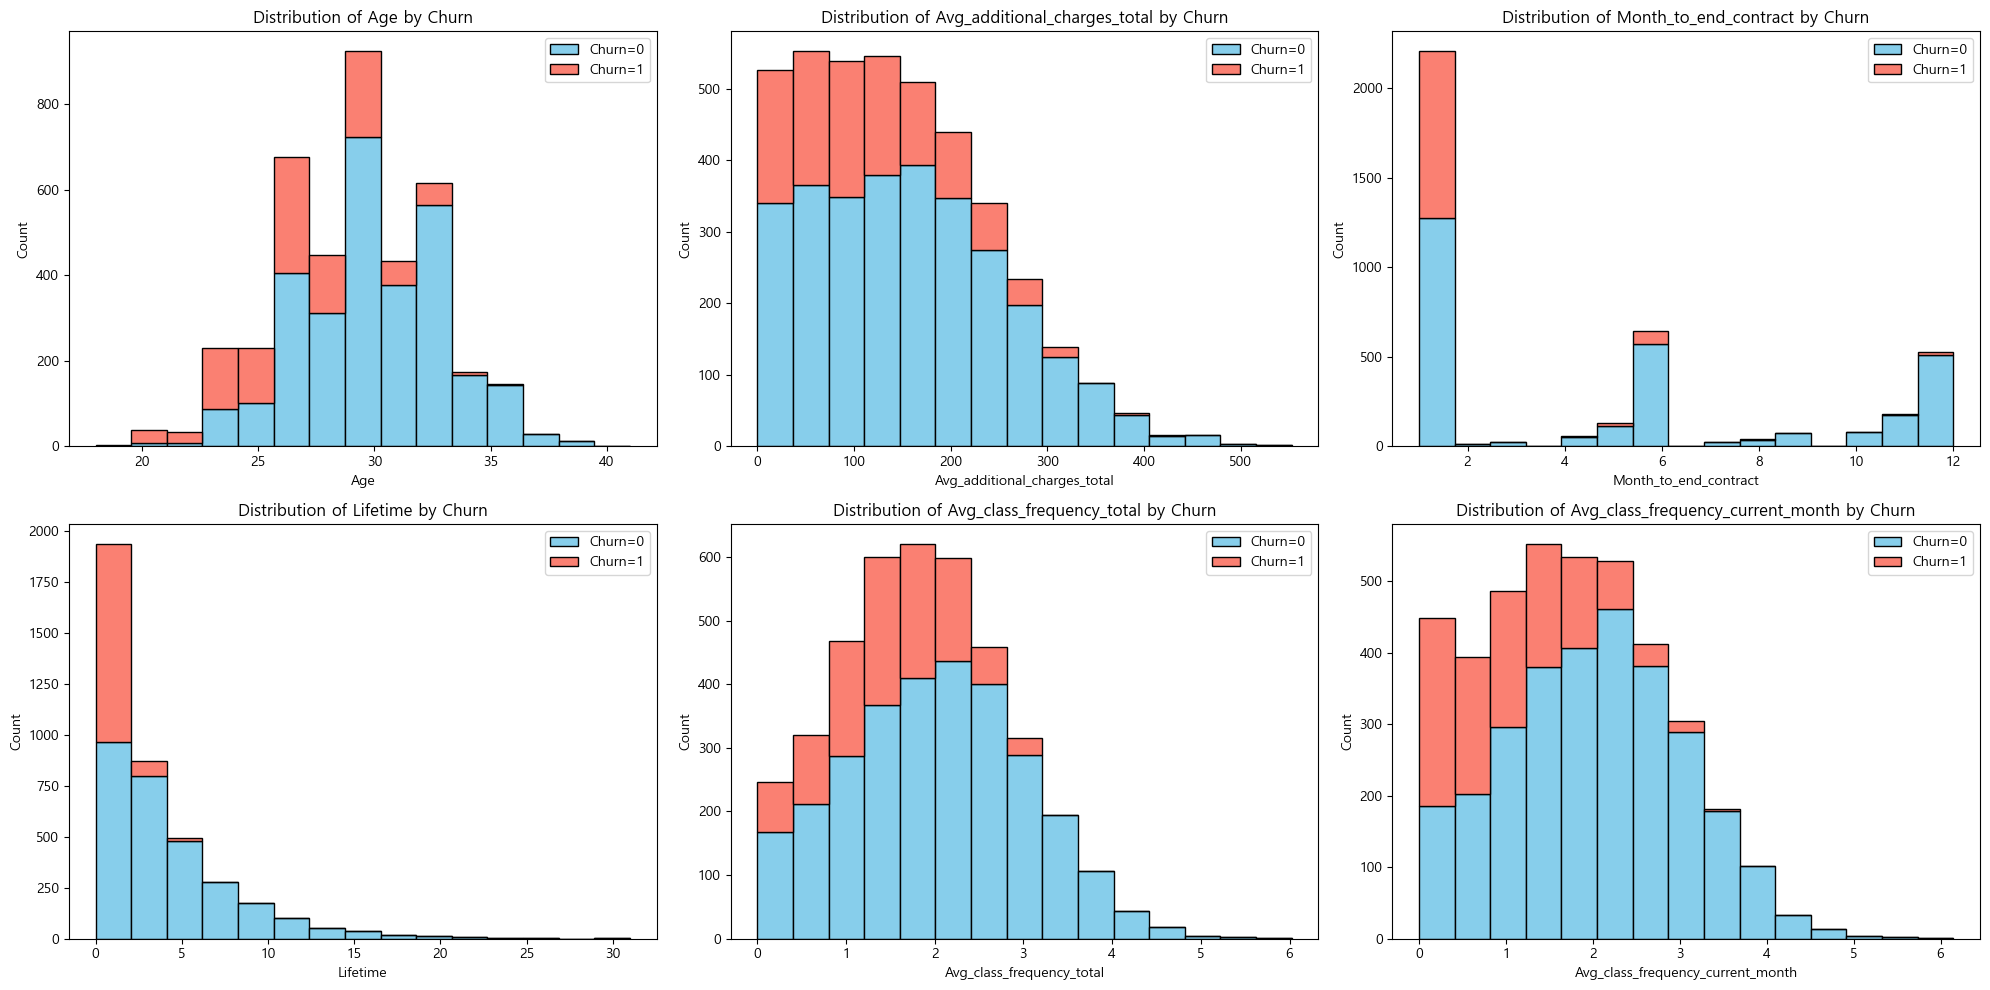

In [16]:
# 그래프 한 눈에 보는 버전

# 범주형 및 수치형 변수 정의
categorical_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits']
numerical_columns = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

# 범주형 그래프 배치
plt.figure(figsize=(20, 10))
for idx, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 4, idx)
    result = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    result.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], ax=plt.gca(),edgecolor='k')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(loc="upper right")
    

plt.tight_layout()
plt.show()

# 수치형 그래프 배치
plt.figure(figsize=(20, 10))
for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, idx)
    plt.hist([df[df['Churn'] == 0][col], df[df['Churn'] == 1][col]], 
             bins=15, stacked=True, color=['skyblue', 'salmon'], label=['Churn=0', 'Churn=1'], edgecolor='k')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(loc="upper right")
    
plt.tight_layout()
plt.show()


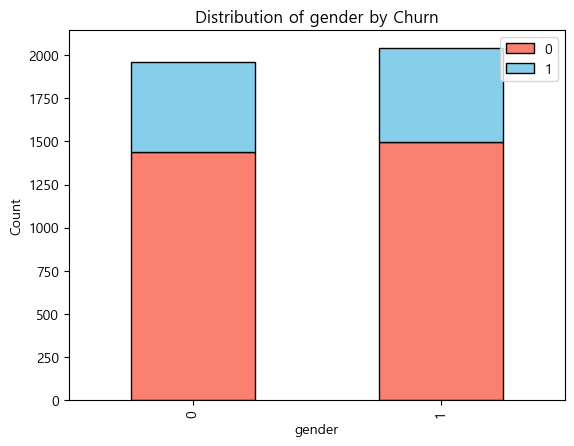

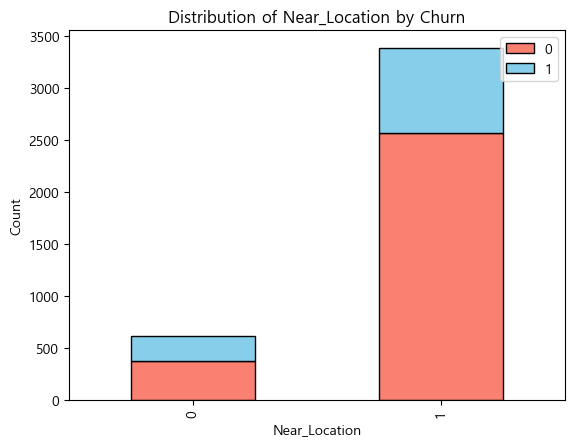

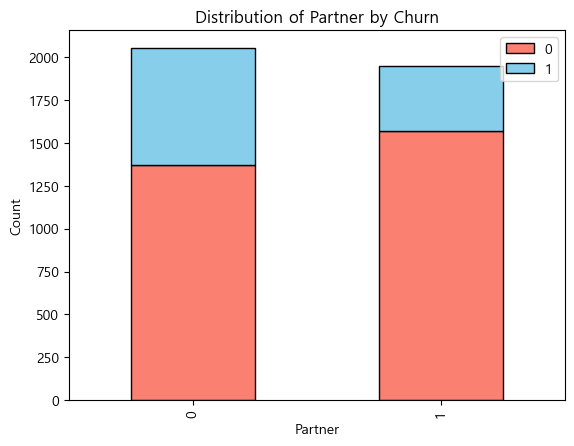

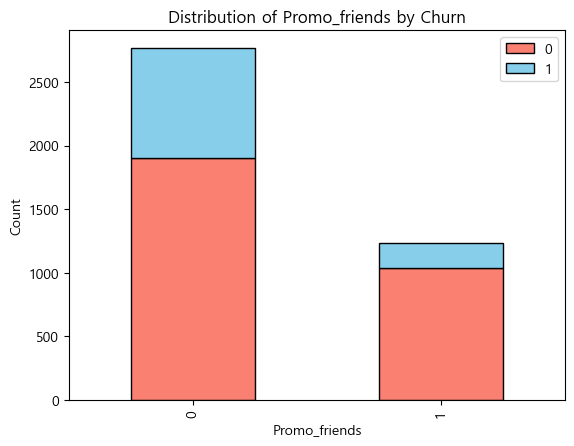

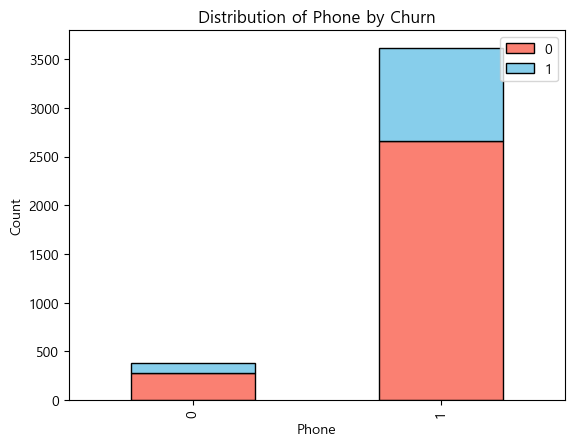

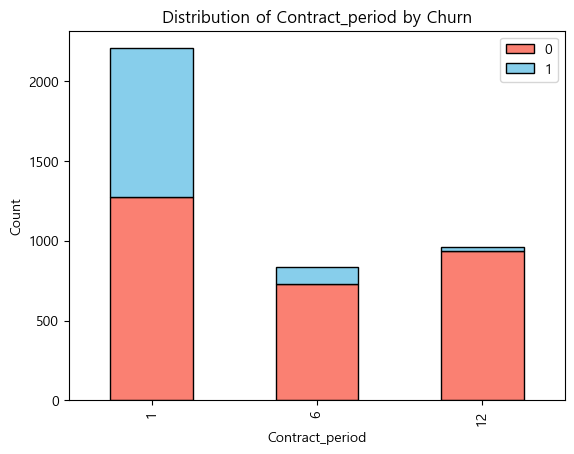

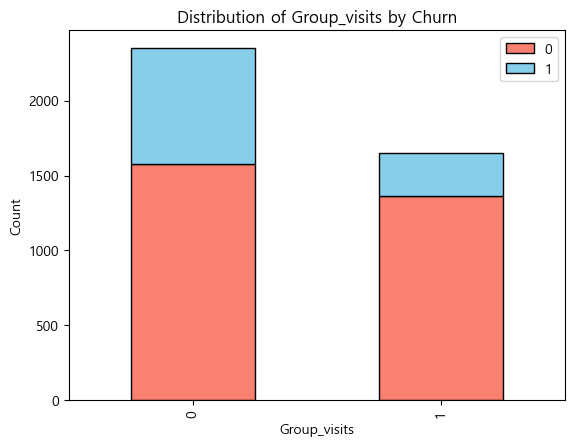

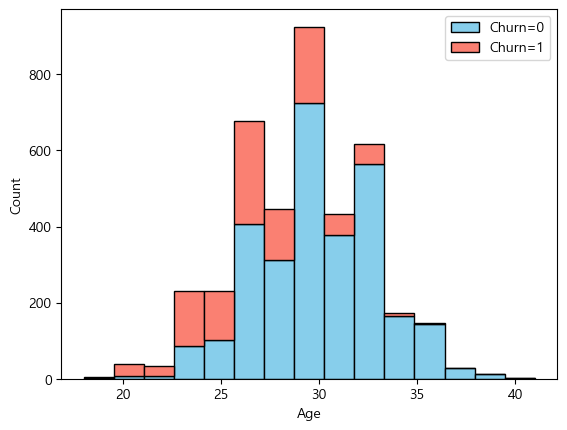

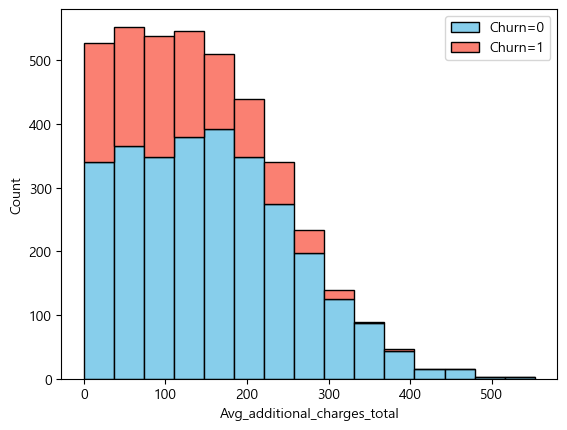

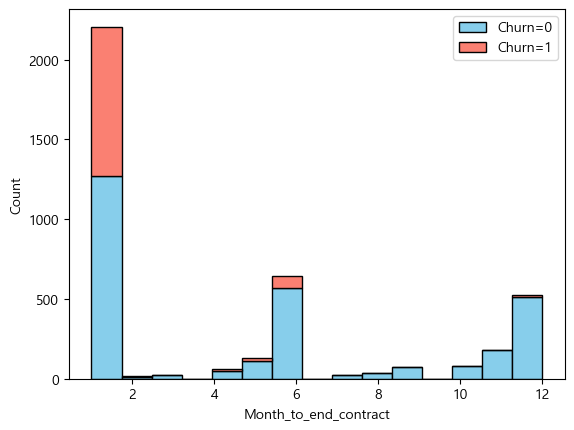

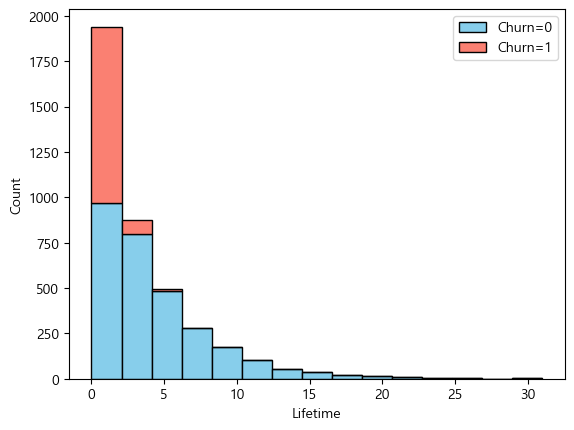

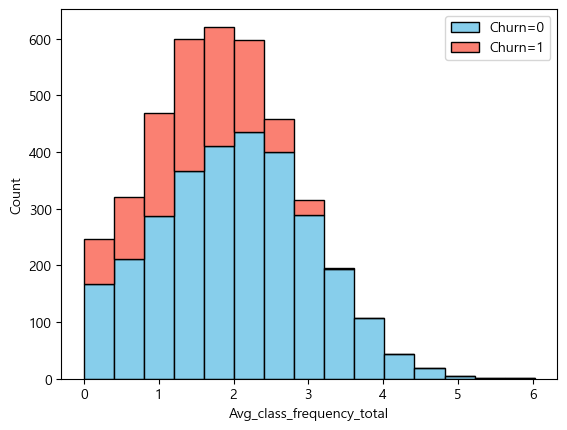

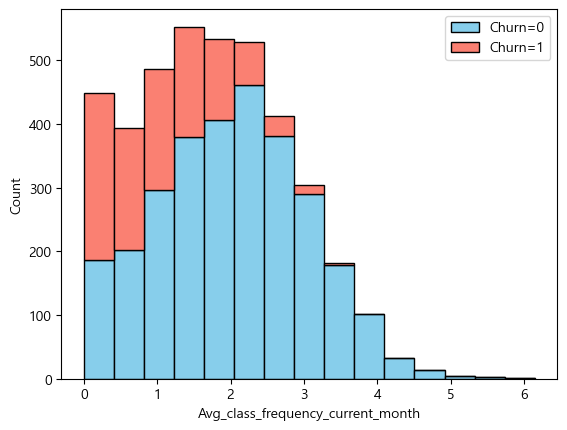

In [8]:
# 그래프 하나씩 보는 버전
categorical_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits']
numerical_columns = ['Age','Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']


# 각 범주형 변수에 대해 Churn 값을 기준으로 쌓인 막대 그래프 생성
for i in categorical_columns:
    # groupby를 통해 i와 Churn 별로 count를 계산
    result = df.groupby([i, 'Churn']).size().unstack(fill_value=0)
    result.plot(
        kind='bar', 
        stacked=True,
        title=f'Distribution of {i} by Churn',
        color=['salmon','skyblue'],
        edgecolor='k')
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.legend(title='Churn')
    plt.legend(loc="upper right")
    plt.show()


# 각 숫자형 변수에 대해 Churn 값을 기준으로 쌓인 막대 그래프 생성
for i in numerical_columns:
    plt.hist([df[df['Churn'] == 0][i], df[df['Churn'] == 1][i]], 
             bins=15, stacked=True, color=['skyblue', 'salmon'], label=['Churn=0', 'Churn=1'], edgecolor='k')
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.legend(title='Churn')
    plt.legend(loc="upper right")
    plt.show()


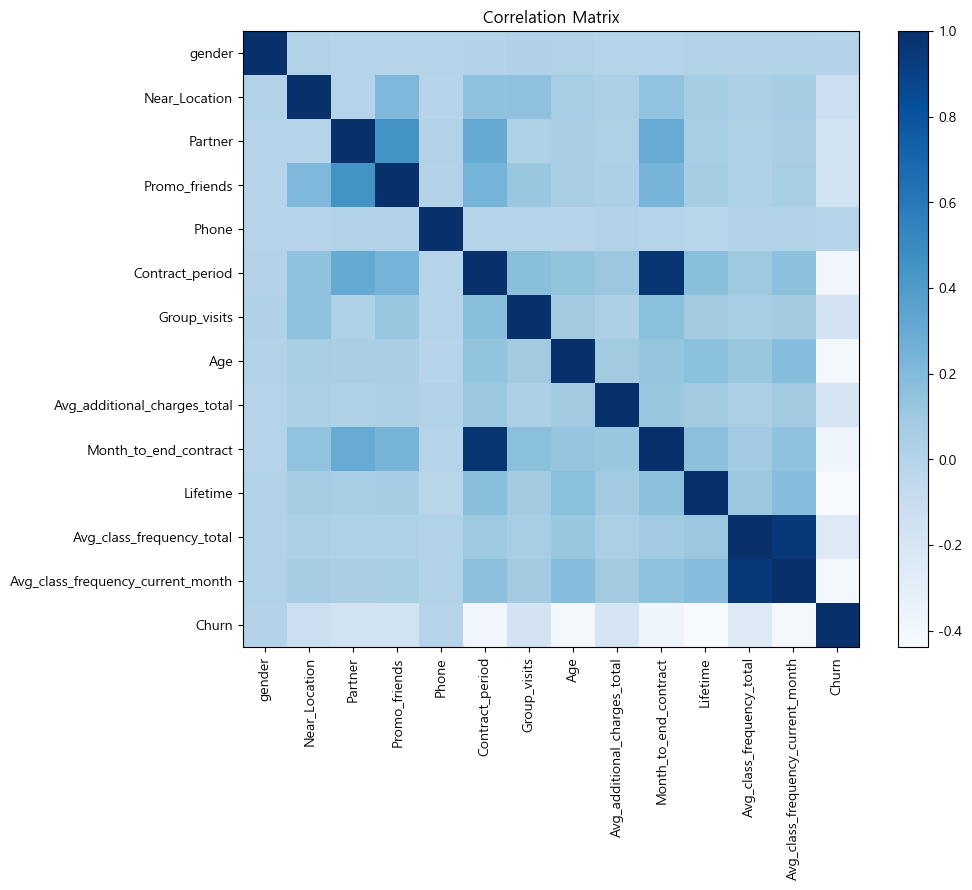

In [5]:
correlation_matrix = df.select_dtypes(include="number").corr()
# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="Blues")
plt.colorbar()

# 축에 컬럼 이름 추가
column_names = correlation_matrix.columns
plt.xticks(range(len(column_names)), column_names, rotation=90)
plt.yticks(range(len(column_names)), column_names)

plt.title("Correlation Matrix")
plt.show()

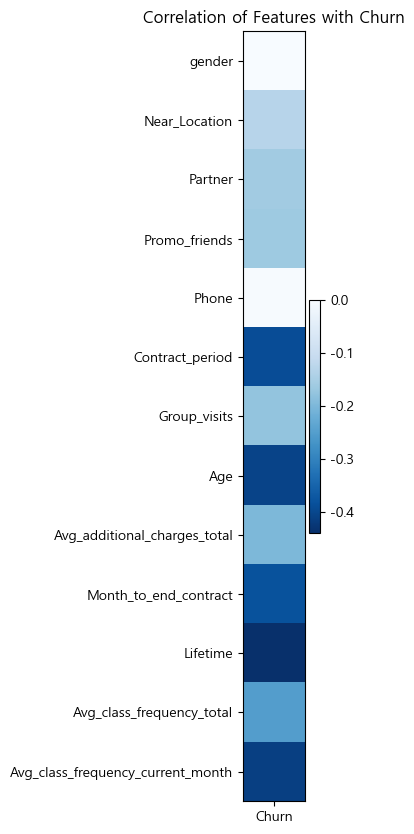

In [6]:
# 'Churn' 컬럼과의 상관 관계만 추출
churn_correlation = correlation_matrix["Churn"].drop("Churn")

# 시각화
plt.figure(figsize=(1, 10))
plt.imshow(churn_correlation.values[:, None], aspect='auto', cmap="Blues_r")
plt.colorbar()
plt.yticks(range(len(churn_correlation.index)), churn_correlation.index)
plt.xticks([0], ["Churn"])

plt.title("Correlation of Features with Churn")
plt.show()